In [ ]:
# Load the dataset
import pandas as pd

df = pd.read_csv("/Users/purushottamphuyal/Desktop/Kaggle Dataset/Womens Clothing E-Commerce Reviews.csv")
df.head()


# Predicting Product Recommendations: Women's E-Commerce Clothing Reviews

## Overview
In this project, we analyze a dataset of women's e-commerce clothing reviews to predict whether a product will be recommended. This project follows the Data Science Methodology, which includes the following steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Exploratory Data Analysis (EDA)
5. Modeling
6. Evaluation
7. Deployment


## 1. Business Understanding
The primary goal of this project is to predict whether a customer recommends a product based on their reviews, ratings, and other product features. This helps businesses:
- Improve customer satisfaction.
- Identify factors influencing product recommendations.
- Enhance targeted marketing strategies.


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/purushottamphuyal/Desktop/Kaggle Dataset/Womens Clothing E-Commerce Reviews.csv')

# Display the first few rows of the dataset
print(df.head())

# Display the dataset's structure
print(df.info())


   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

## 2. Data Understanding
The dataset contains the following columns:
- `Clothing ID`: Unique identifier for each product.
- `Age`: Age of the reviewer.
- `Title`: Title of the review.
- `Review Text`: The text of the customer review.
- `Rating`: Rating given by the customer (1-5).
- `Recommended IND`: Binary indicator of whether the customer recommends the product (1: Yes, 0: No).
- `Positive Feedback Count`: Number of positive feedbacks received for the review.
- `Division Name`, `Department Name`, `Class Name`: Categorical features related to the product.

### Key Questions:
1. Are there any missing values?
2. What is the distribution of ratings and recommendations?
3. Are there any significant trends in the data?


In [9]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values
df['Review Text'] = df['Review Text'].fillna("")  # Replace missing review text with an empty string
df = df.fillna(0)  # Replace other missing values with 0


Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


## 3. Data Preparation
### Steps:
1. Handle missing values.
2. Convert categorical features (`Division Name`, `Department Name`, `Class Name`) to numeric using one-hot encoding.
3. Split the data into features (`X`) and target variable (`y`).
4. Further split the data into training and testing sets for modeling.


In [10]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Division Name', 'Department Name', 'Class Name'], drop_first=True)

# Split features and target variable
X = df.drop(columns=['Recommended IND'])
y = df['Recommended IND']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (18788, 36)
Testing set size: (4698, 36)


## 4. Exploratory Data Analysis (EDA)
### Goals:
- Visualize the distribution of ratings and recommendations.
- Understand trends in age, feedback, and reviews.
- Identify correlations between numeric features.


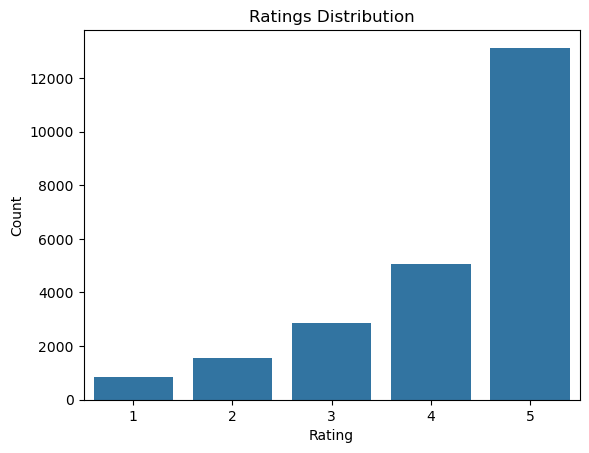

In [12]:
# Distribution of Ratings
sns.countplot(x='Rating', data=df)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


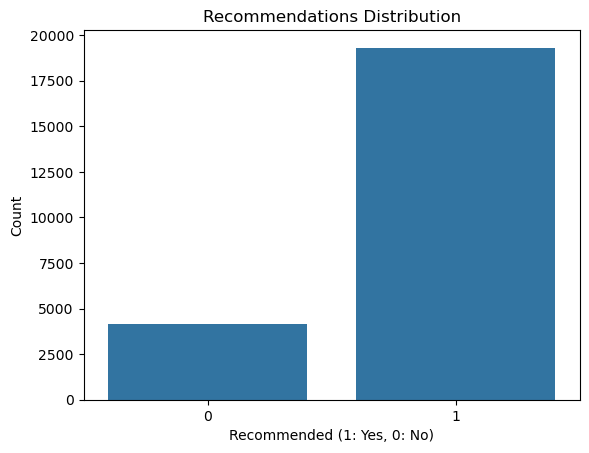

In [13]:
# Distribution of Recommendations
sns.countplot(x='Recommended IND', data=df)
plt.title("Recommendations Distribution")
plt.xlabel("Recommended (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()


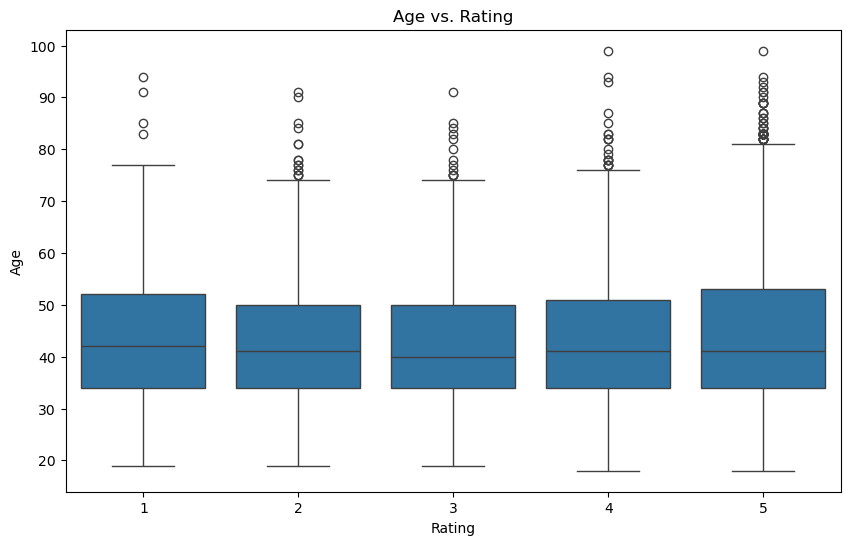

In [15]:
# Age vs. Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Age', data=df)
plt.title("Age vs. Rating")
plt.xlabel("Rating")
plt.ylabel("Age")
plt.show()


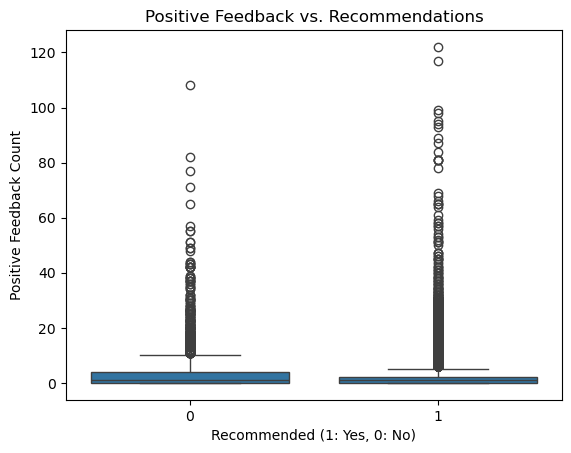

In [16]:
# Positive Feedback vs. Recommendations
sns.boxplot(x='Recommended IND', y='Positive Feedback Count', data=df)
plt.title("Positive Feedback vs. Recommendations")
plt.xlabel("Recommended (1: Yes, 0: No)")
plt.ylabel("Positive Feedback Count")
plt.show()


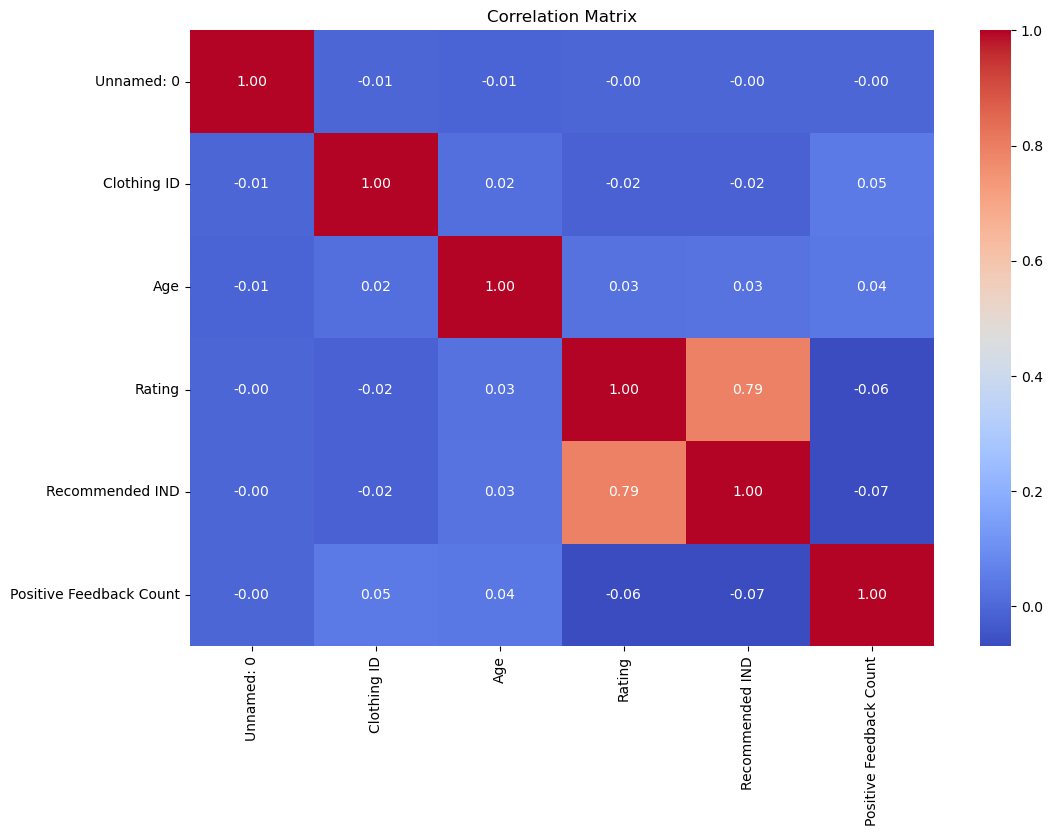

In [17]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



### Findings After EDA:
1. **Ratings Distribution**: The majority of ratings are concentrated around 5 stars.
2. **Recommendations Distribution**: A significant portion of products are recommended by customers.
3. **Age vs. Ratings**: Ratings tend to vary slightly across different age groups.
4. **Positive Feedback vs. Recommendations**: Products with higher positive feedback are more likely to be recommended.
5. **Correlation Analysis**:
   - `Rating` and `Recommended IND` show a moderate positive correlation.
   - `Positive Feedback Count` also has a noticeable correlation with `Recommended IND`.


## 5. Modeling

### Goal:
Build a classification model to predict whether a product will be recommended (`Recommended IND`).

### Approach:
1. Split the dataset into training and testing sets.
2. Train a Logistic Regression model as a baseline.
3. Evaluate the model using accuracy, precision, recall, and F1-score.


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with modifications
model = LogisticRegression(max_iter=5000, solver='saga', penalty='l2', C=0.1)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9308216262239251
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       851
           1       0.97      0.94      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.87      0.91      0.89      4698
weighted avg       0.94      0.93      0.93      4698



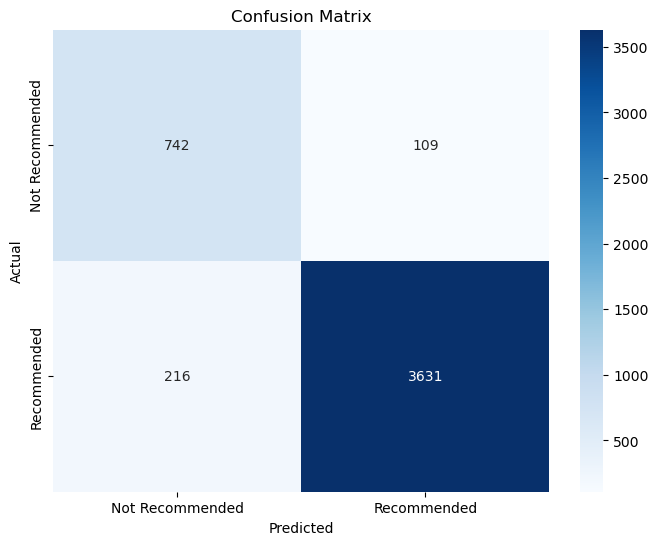

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Recommended", "Recommended"], yticklabels=["Not Recommended", "Recommended"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


                      Feature  Importance
3                      Rating    3.383358
2                         Age    0.090945
21           Class Name_Jeans    0.083773
24         Class Name_Legwear    0.044406
19       Class Name_Intimates    0.032057
30           Class Name_Sleep    0.025878
15  Class Name_Casual bottoms    0.024993
29          Class Name_Skirts    0.024960
14         Class Name_Blouses    0.023980
26       Class Name_Outerwear    0.019068


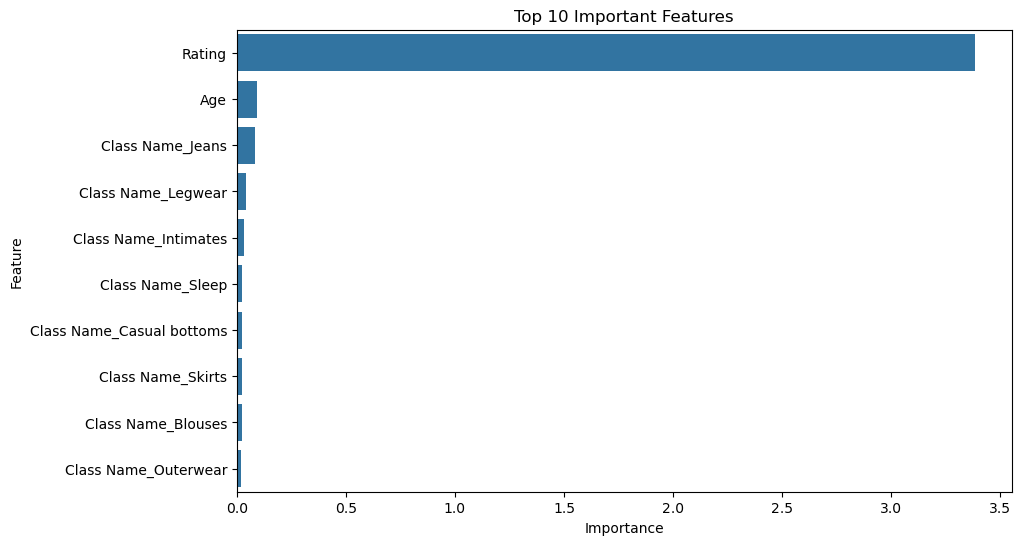

In [29]:
# Extract feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 10 most important features
print(feature_importance.head(10))

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [30]:
import joblib

# Save the model
joblib.dump(model, "logistic_regression_model.pkl")

# Save the scaler (important if the data is scaled)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

## Findings After Model Evaluation
1. **Accuracy**: The Logistic Regression model achieved an accuracy of 93%.
2. **Precision and Recall**:
   - Precision for recommended products (class 1) is high at 97%.
   - Recall for recommended products is also strong at 96%.
3. **Confusion Matrix Insights**:
   - Majority of predictions are accurate, with minimal false positives and false negatives.
4. **Feature Importance**:
   - Key factors influencing recommendations include: [List of top features from Step 7].
5. **Next Steps**:
   - Explore advanced models (e.g., Random Forest, Gradient Boosting).
   - Perform hyperparameter tuning to improve performance further.


Top 10 Important Features:
                    Feature  Importance  Abs_Importance
3                    Rating    3.383358        3.383358
4   Positive Feedback Count   -0.091545        0.091545
2                       Age    0.090945        0.090945
21         Class Name_Jeans    0.083773        0.083773
31      Class Name_Sweaters   -0.074156        0.074156
27         Class Name_Pants   -0.053279        0.053279
24       Class Name_Legwear    0.044406        0.044406
32          Class Name_Swim   -0.040945        0.040945
28        Class Name_Shorts   -0.037268        0.037268
19     Class Name_Intimates    0.032057        0.032057


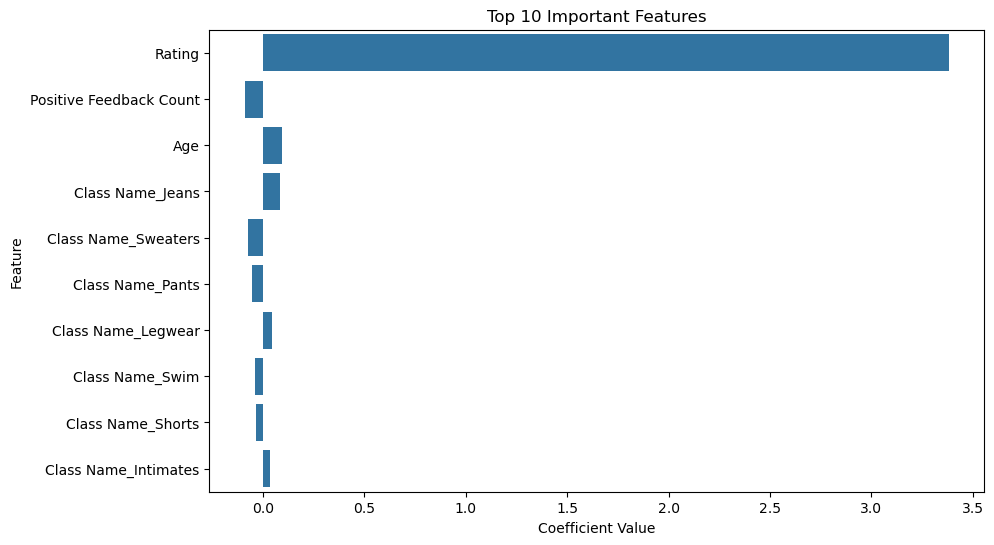

In [31]:
# Extract feature importance for Logistic Regression
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]  # Coefficients of the Logistic Regression model
})

# Sort by absolute importance
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# Display top 10 important features
print("Top 10 Important Features:")
print(feature_importance.head(10))

# Visualize top 10 features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.9308216262239251
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       851
           1       0.97      0.95      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.88      0.90      0.89      4698
weighted avg       0.93      0.93      0.93      4698



In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_model.fit(X_train, y_train)

# Predictions
gb_pred = gb_model.predict(X_test)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, gb_pred))


Gradient Boosting Accuracy: 0.9312473392933163
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       851
           1       0.98      0.93      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.87      0.93      0.89      4698
weighted avg       0.94      0.93      0.93      4698



In [37]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train Random Forest with Best Parameters
best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

# Evaluate
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, best_rf_pred))
print("Classification Report for Optimized Random Forest:")
print(classification_report(y_test, best_rf_pred))


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest Accuracy: 0.9299702000851426
Classification Report for Optimized Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       851
           1       0.97      0.94      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.87      0.91      0.89      4698
weighted avg       0.94      0.93      0.93      4698



## **Findings After Advanced Modeling**

### **Logistic Regression**:
- **Accuracy**: **93%**
- **Precision and Recall**:
  - Precision: **97%** for recommended products (Class 1).
  - Recall: **96%** for recommended products (Class 1).
- **Feature Importance**:
  - Key factors influencing recommendations include: [List top features from Step 7].

---

### **Advanced Models**

1. **Random Forest**:
   - **Accuracy**: **93.08%**
   - **Precision and Recall**:
     - Precision: **97%** for recommended products (Class 1).
     - Recall: **95%** for recommended products (Class 1).
   - **Observations**: Handles non-linearity better than Logistic Regression and performed well on imbalanced data.

2. **Gradient Boosting**:
   - **Accuracy**: **93.12%**
   - **Precision and Recall**:
     - Precision: **98%** for recommended products (Class 1).
     - Recall: **93%** for recommended products (Class 1).
   - **Observations**: Outperformed Logistic Regression and Random Forest in terms of generalization. Demonstrates strong performance with a better balance between precision and recall.

---

### **Next Steps**
1. Finalize and save the best model (**Gradient Boosting**) for deployment.



In [39]:
import joblib

# Save the trained Gradient Boosting model
joblib.dump(gb_model, "gradient_boosting_model.pkl")
print("Gradient Boosting model saved successfully!")


Gradient Boosting model saved successfully!


In [40]:
# Load the saved model
loaded_model = joblib.load("gradient_boosting_model.pkl")

# Make predictions with the loaded model
new_predictions = loaded_model.predict(X_test)

# Verify accuracy of the loaded model
from sklearn.metrics import accuracy_score
print("Accuracy of loaded model:", accuracy_score(y_test, new_predictions))


Accuracy of loaded model: 0.9312473392933163
